In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. 데이터 준비

In [2]:
data = pd.read_csv("data/Byeonghap_final5.csv", index_col = 0)

In [3]:
df = pd.DataFrame(data)
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6명,0
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27명,0
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0명,0
3,마다가스카르 사진전,사진,2322000,38,6110500,54명,0
4,인형의 시간들,출판,727000,36,2019400,29명,0
...,...,...,...,...,...,...,...
9590,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트
9591,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈
9592,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>"
9593,함께 행복하개! 유기견 팔찌,캐릭터 · 굿즈,865000,173,5000,45,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.


In [4]:
# 인덱스 리셋
df=df.reset_index()
df

,index,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description
0,0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6명,0
1,1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27명,0
2,2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0명,0
3,3,마다가스카르 사진전,사진,2322000,38,6110500,54명,0
4,4,인형의 시간들,출판,727000,36,2019400,29명,0
...,...,...,...,...,...,...,...,...
9705,9590,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트
9706,9591,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈
9707,9592,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>"
9708,9593,함께 행복하개! 유기견 팔찌,캐릭터 · 굿즈,865000,173,5000,45,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.


In [5]:
del df["index"]

In [6]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6명,0
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27명,0
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0명,0
3,마다가스카르 사진전,사진,2322000,38,6110500,54명,0
4,인형의 시간들,출판,727000,36,2019400,29명,0
...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>"
9708,함께 행복하개! 유기견 팔찌,캐릭터 · 굿즈,865000,173,5000,45,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.


In [7]:
# 결과 컬럼 추가 : 성사 - 1 , 실패 - 0

df["result"] = 3   # 아무값이나 해서 컬럼 생성

for i in range(len(df["percentage"])):
    if df["percentage"][i] >= 100:
        df["result"][i] = 1
    else: 
        df["result"][i] = 0

In [8]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6명,0,0
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27명,0,0
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0명,0,0
3,마다가스카르 사진전,사진,2322000,38,6110500,54명,0,0
4,인형의 시간들,출판,727000,36,2019400,29명,0,0
...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1
9708,함께 행복하개! 유기견 팔찌,캐릭터 · 굿즈,865000,173,5000,45,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.,1


## label 인코딩

In [59]:
#### label인코딩

from sklearn.preprocessing import LabelEncoder

items = df["category"].unique()
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print("인코딩 변환값:", labels)
print("인코딩 클래스:", encoder.classes_)   # 21개 카테고리

인코딩 변환값: [16 15  2  6 13 20 12 14  8 17  3 10 11 18  7  1  9  0  5 19  4]
인코딩 클래스: ['공연' '디자인' '디자인 문구' '디지털 게임' '반려동물' '보드게임 · TRPG' '사진' '영화 · 비디오' '예술'
 '웹툰 · 만화' '웹툰 리소스' '음악' '의류' '잡화' '주얼리' '출판' '캐릭터 · 굿즈' '테크 · 가전' '푸드'
 '향수 · 뷰티' '홈 · 리빙']


In [60]:
category_items = df["category"]
category_labels = encoder.transform(category_items)
print(category_labels)

df["category_label"] = category_labels

[16 15  2 ... 15 16 20]


In [61]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result,category_label
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6명,0,0,16
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27명,0,0,15
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0명,0,0,2
3,마다가스카르 사진전,사진,2322000,38,6110500,54명,0,0,6
4,인형의 시간들,출판,727000,36,2019400,29명,0,0,15
...,...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1,20
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1,15
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1,15
9708,함께 행복하개! 유기견 팔찌,캐릭터 · 굿즈,865000,173,5000,45,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.,1,16


## 상관분석

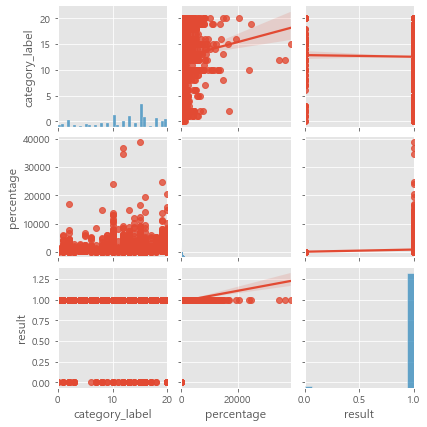

In [26]:
sns.pairplot(df, vars = ["category_label", "percentage", "result"], size = 2, kind="reg")   

In [62]:
# 피어슨 상관관계
rho, p_val = stats.pearsonr(df["category_label"],df["result"])

print("correlation coefficient : {}, p-value:{}".format(rho, p_val))

correlation coefficient : -0.007545299236934102, p-value:0.45722525459671093


In [63]:
# 스피어만 상관관계
rho, p_val = stats.spearmanr(df["category_label"],df["result"])

print("correlation coefficient : {}, p-value:{}".format(rho, p_val))

correlation coefficient : -0.009543344318791534, p-value:0.3470662022996086


## one-hot 인코딩

In [28]:
from sklearn.preprocessing import OneHotEncoder

items = df["category"].unique()
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)


# 2차원 배열로 변환
labels = labels.reshape(-1, 1) 

one = OneHotEncoder()
one.fit(labels)
ot = one.transform(labels)

print("원-핫 인코딩 데이터")
print(ot.toarray())
print("크기:", ot.shape)

원-핫 인코딩 데이터
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [57]:
df2 = pd.DataFrame({"category_onehot" : df["category"].unique()})
df2

df3 = pd.get_dummies(df2)      

In [58]:
df3

,category_onehot_공연,category_onehot_디자인,category_onehot_디자인 문구,category_onehot_디지털 게임,category_onehot_반려동물,category_onehot_보드게임 · TRPG,category_onehot_사진,category_onehot_영화 · 비디오,category_onehot_예술,category_onehot_웹툰 · 만화,...,category_onehot_음악,category_onehot_의류,category_onehot_잡화,category_onehot_주얼리,category_onehot_출판,category_onehot_캐릭터 · 굿즈,category_onehot_테크 · 가전,category_onehot_푸드,category_onehot_향수 · 뷰티,category_onehot_홈 · 리빙
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
##### but, df에 적용은 안함

In [56]:
df[["result", "category"]].value_counts()

result  category   
1       출판             1836
        웹툰 리소스         1010
        잡화              858
        푸드              750
        캐릭터 · 굿즈        746
        홈 · 리빙          660
        디자인 문구          528
        의류              478
        향수 · 뷰티         474
        주얼리             328
        예술              314
        웹툰 · 만화         305
        보드게임 · TRPG     258
        디자인             218
        음악              156
        영화 · 비디오        148
        사진              136
        디지털 게임          130
        공연              105
        테크 · 가전          69
        반려동물             54
0       캐릭터 · 굿즈         33
        잡화               29
        출판               22
        홈 · 리빙           12
        의류                7
        웹툰 리소스            6
        예술                6
        디자인 문구            6
        디지털 게임            5
        테크 · 가전           4
        영화 · 비디오          4
        주얼리               3
        디자인               3
        음악                2


# 2. 산점도

In [7]:
X = df.category.values # 카테고리
y = df.result.values # 달성여부
y2 = df.percentage.values # 달성률

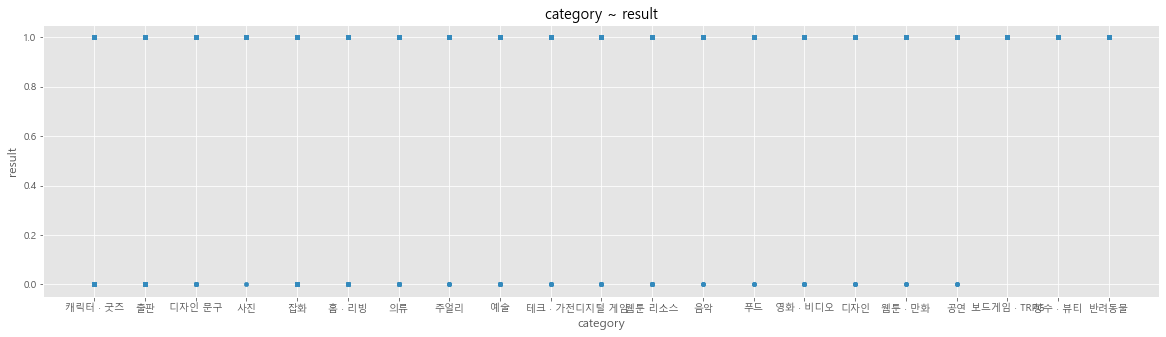

In [8]:
# 그래프 모양 조절
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='category', y='result', figsize=(20,5))
plt.title("category ~ result")
plt.xlabel("category")
plt.ylabel("result")
plt.show()

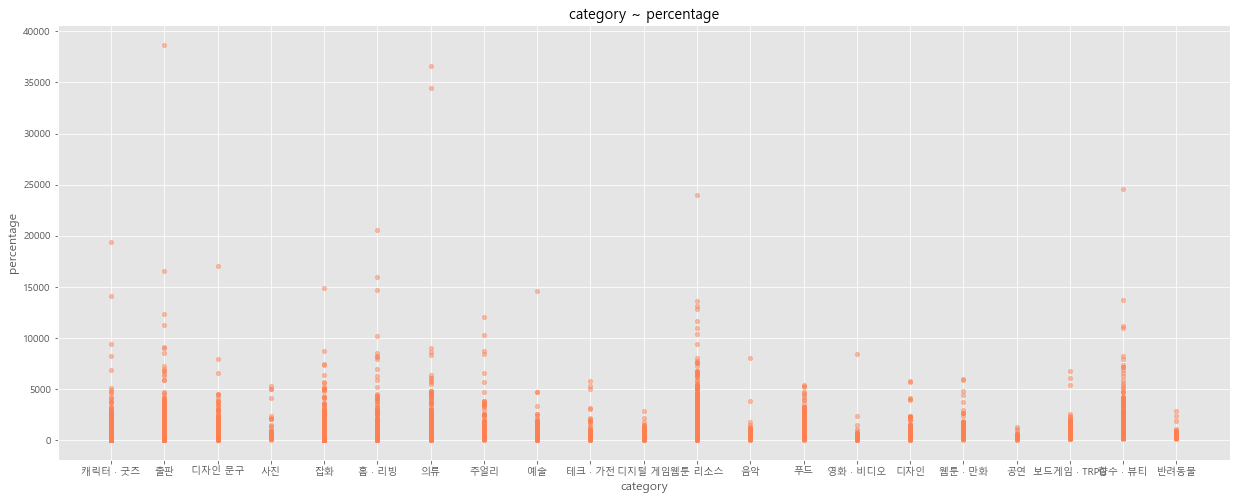

In [12]:
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='category', y='percentage', c='coral', s=20, figsize=(21,8), alpha=.5)
plt.title("category ~ percentage")
plt.xlabel("category")
plt.ylabel("percentage")
plt.show()

선형회귀분석

In [11]:
import statsmodels.api as sm

reg = sm.OLS.from_formula("category ~ percentage", df).fit()
reg.summary()

ValueError: endog has evaluated to an array with multiple columns that has shape (9710, 21). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [12]:
X = df.category.values
y = df.result.values

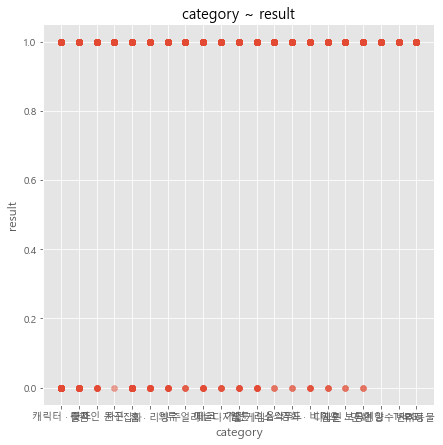

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X, y, alpha=0.5)
plt.title("category ~ result")
plt.xlabel("category")
plt.ylabel("result")
plt.show()

# 3. 정규화

In [49]:
from sklearn.preprocessing import MinMaxScaler         

scaler = MinMaxScaler()
scaler.fit(df)
result_scaled = scaler.transform(df)

df_normed = pd.DataFrame(data = result_scaled, columns = final.columns)

print("변수들의 최솟값: \n", final_normed.min())
print("-----------------------------------------------------")
print("변수들의 최댓값: \n", final_normed.max())

# 최솟값과 최댓값의 격차가 줄어들었다.

ValueError: could not convert string to float: "짐볼로 만든 인형, '돌리볼리'"

In [50]:
from statsmodels.formulta.api import ols

ModuleNotFoundError: No module named 'statsmodels.formulta'

In [51]:
!pip install statsmodels